<a href="https://www.kaggle.com/code/fadynabilmofeed/cnn-early-stopping-data-augmentation-and-visual?scriptVersionId=178452407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

/bin/bash: is/kaggle/input/imageaa: No such file or directory


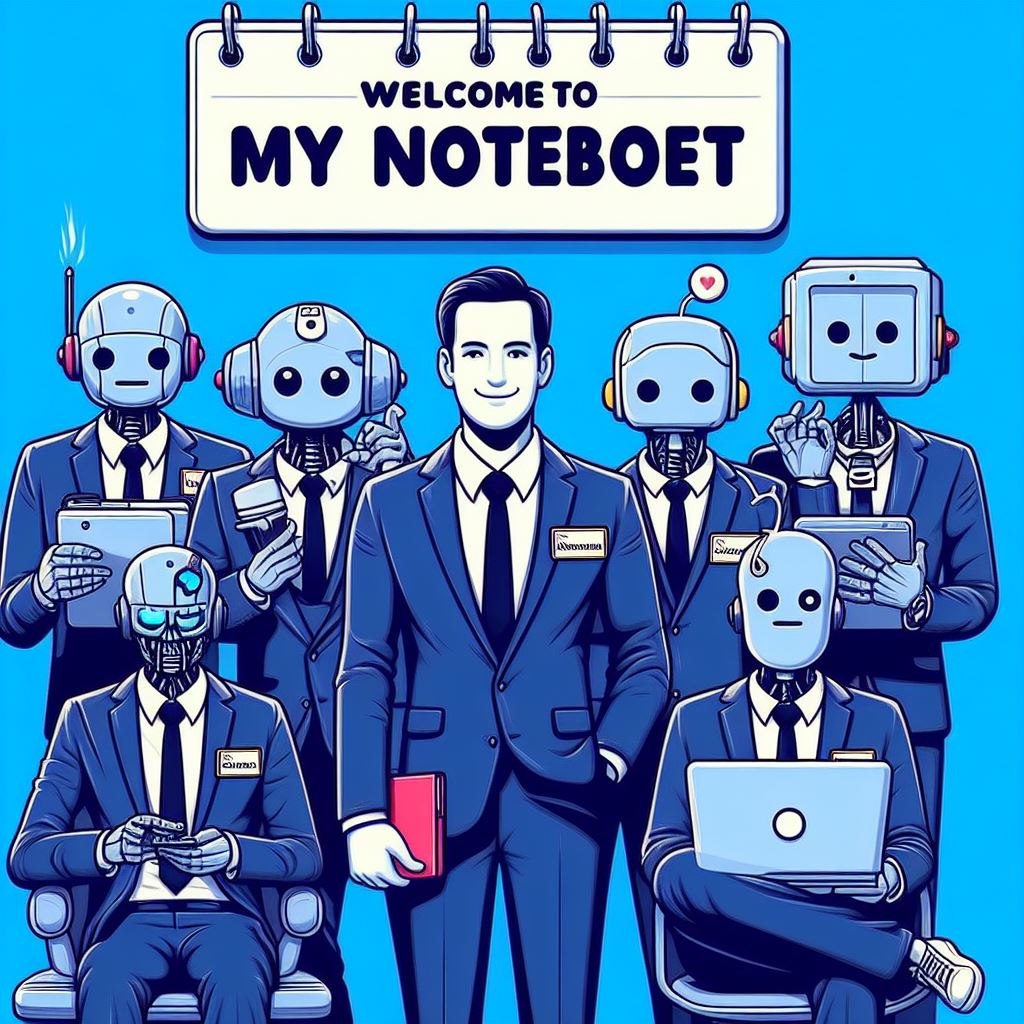

In [1]:
from IPython.display import Image
import os
!is/kaggle/input/imageaa

Image('/kaggle/input/imageaa/_0710389c-c688-44d2-864f-1377bee9a620.jpg')

# Importing Libraries

In [2]:
from IPython.display import Image
import os
!is/kaggle/input/imageaa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/bin/bash: is/kaggle/input/imageaa: No such file or directory


2024-05-18 23:08:04.291922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 23:08:04.292097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 23:08:04.458743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# EDA 

In [3]:
# important Constants
img_rows, img_cols = 28, 28
num_classes = 10
batch_size = 128
epochs = 50

In [4]:
# Data Preparation Function
def data_prep(raw):
    out_y = to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255.0
    return out_x, out_y

In [5]:
# Testing the function
def test_data_prep(raw):
    num_images = raw.shape[0]
    x_as_array = raw.values
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255.0
    return out_x

In [6]:
train_file = "../input/digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)
X, y = data_prep(raw_data)

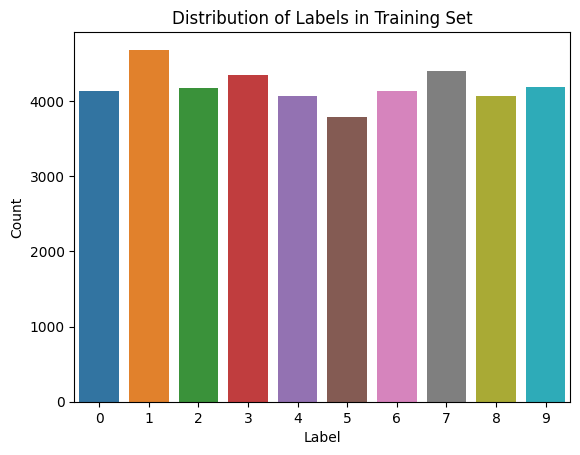

In [7]:
# Visualize the distribution of labels in the training set
sns.countplot(x=raw_data['label'])
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

It is a balanced data set.

In [8]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmntation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

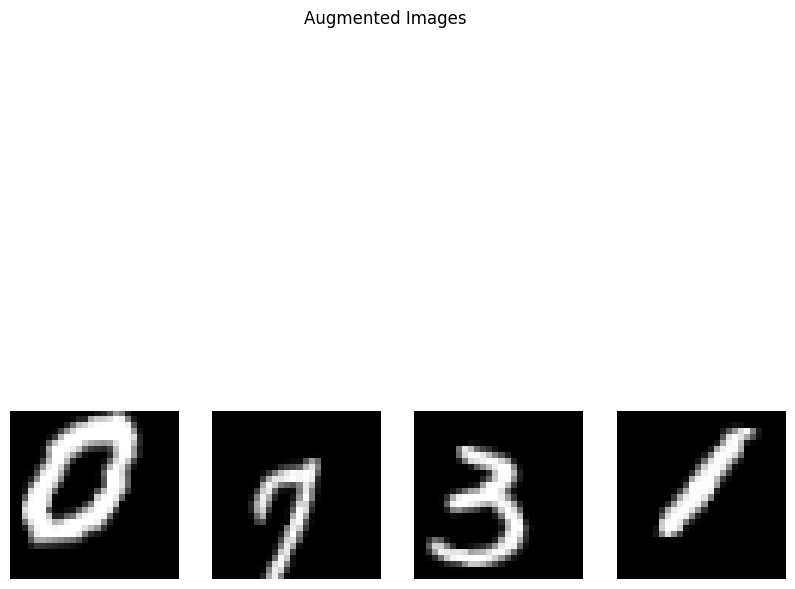

In [9]:
# Visualize some augmnted images
augmented_images, _ = next(datagen.flow(X_train, y_train, batch_size=4))
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i in range(4):
    axes[i].imshow(augmented_images[i].reshape(img_rows, img_cols), cmap='gray')
    axes[i].axis('off')
plt.suptitle('Augmented Images')
plt.show()

# Building Convolution Nural Network Model

In [10]:
Model = Sequential()
Model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
Model.add(Flatten())
Model.add(Dropout(0.5))

Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(num_classes, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# Compile Model
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train Model

In [12]:
history = Model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4664 - loss: 1.5129
Epoch 1: val_loss improved from inf to 0.13194, saving model to best_model.keras
262/262 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - accuracy: 0.4671 - loss: 1.5109 - val_accuracy: 0.9606 - val_loss: 0.1319
Epoch 2/50
  1/262 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8594 - loss: 0.4136

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.13194 to 0.12251, saving model to best_model.keras
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8594 - loss: 0.4136 - val_accuracy: 0.9632 - val_loss: 0.1225
Epoch 3/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8826 - loss: 0.3846
Epoch 3: val_loss improved from 0.12251 to 0.06595, saving model to best_model.keras
262/262 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.8826 - loss: 0.3844 - val_accuracy: 0.9815 - val_loss: 0.0659
Epoch 4/50
  1/262 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9375 - loss: 0.2846
Epoch 4: val_loss did not improve from 0.06595
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9375 - loss: 0.2846 - val_accuracy: 0.9812 - val_loss: 0.0668
Epoch 5/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9208 - loss: 0.2558
Epoch 5: val_loss improved from 0.06595 to 0.04975, saving model to best_model.keras
262/262 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9208 - loss: 0.2558 - val

The traing validation saturates near 0.0205 and early stoping prevents the model from overfitting so the model is Good Fit

In [13]:
# Load the best model
Model = tf.keras.models.load_model('best_model.keras')

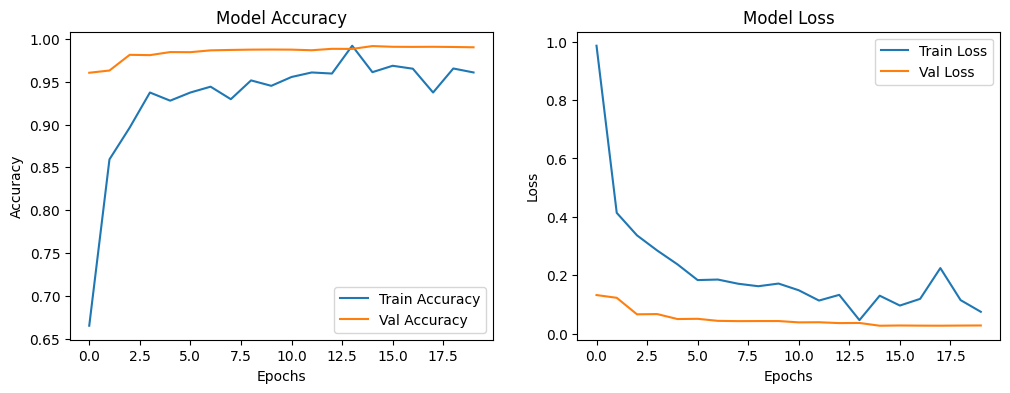

In [14]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model accuracy and loss saturates at certain values which is goo for fitting

In [15]:
# Evluate Model on Validation Set
val_predictions = Model.predict(X_test)
val_pred_classes = np.argmax(val_predictions, axis=1)
y_val_classes = np.argmax(y_test, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [16]:
# Evaluation Metrics
accuracy = np.mean(val_pred_classes == y_val_classes)
conf_matrix = confusion_matrix(y_val_classes, val_pred_classes)
f1 = f1_score(y_val_classes, val_pred_classes, average='weighted')
auc = roc_auc_score(y_test, val_predictions, multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')

Accuracy: 0.9917857142857143
F1 Score: 0.9917866805905545
AUC Score: 0.9999452517487143


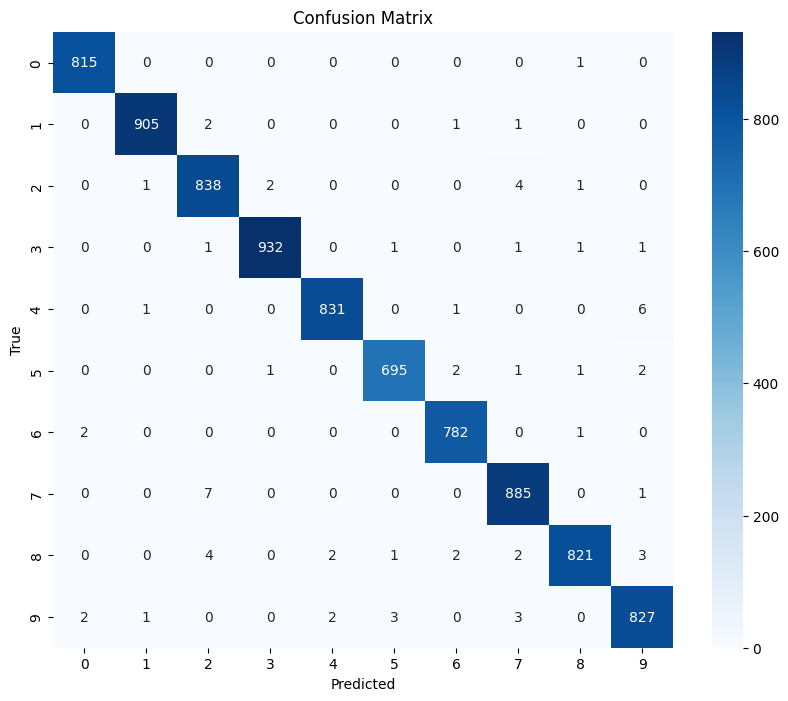

In [17]:
# Confusion Matrix visulization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Load test DataSet
test_file = "/kaggle/input/digit-recognizer/test.csv"
test_data = pd.read_csv(test_file)
X_test = test_data_prep(test_data)

#Predict on Test Data
test_predictions = Model.predict(X_test)
test_pred_classes = np.argmax(test_predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [19]:
# Create Submission File
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_pred_classes) + 1),
    "Label": test_pred_classes
})
submission.to_csv("submission.csv", index=False)

print("Submission file has been created successfully.")

Submission file has been created successfully.
